In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
LABELS = [ "0","1"]

In [10]:
data = pd.read_csv("/kaggle/input/Churn_Modelling.csv")

In [11]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [13]:
categorical_cols = [col for col in data.columns if data[col].dtype == 'object' or data[col].dtype == 'category']

print(categorical_cols)

['Surname', 'Geography']


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [15]:
categorical_cols_1 = [col for col in data.columns if data[col].dtype == 'object' or data[col].dtype == 'category']

print(categorical_cols_1)

[]


In [16]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,0,42,3,75075.31,2,1,0,92888.52,1


In [17]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

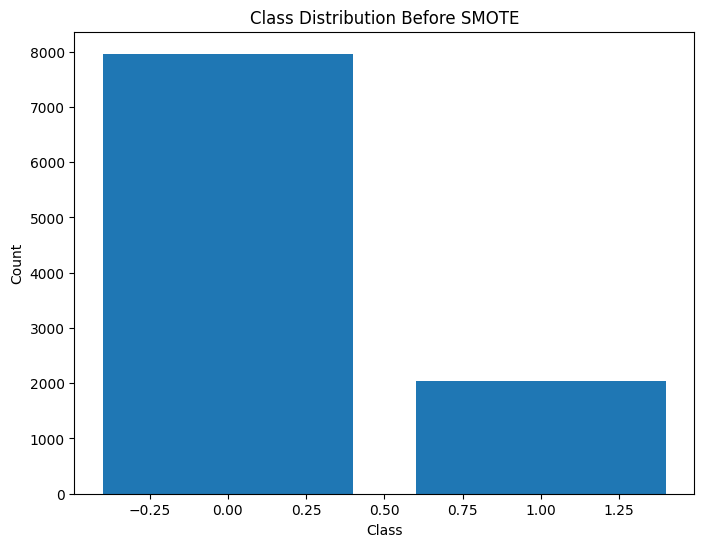

In [18]:
import matplotlib.pyplot as plt

# Before SMOTE
plt.figure(figsize=(8, 6))
plt.bar(data['Exited'].value_counts().index, data['Exited'].value_counts())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before SMOTE')
plt.show()

from imblearn.over_sampling import SMOTE

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
data_balanced, target_balanced = smote.fit_resample(data, data['Exited'])

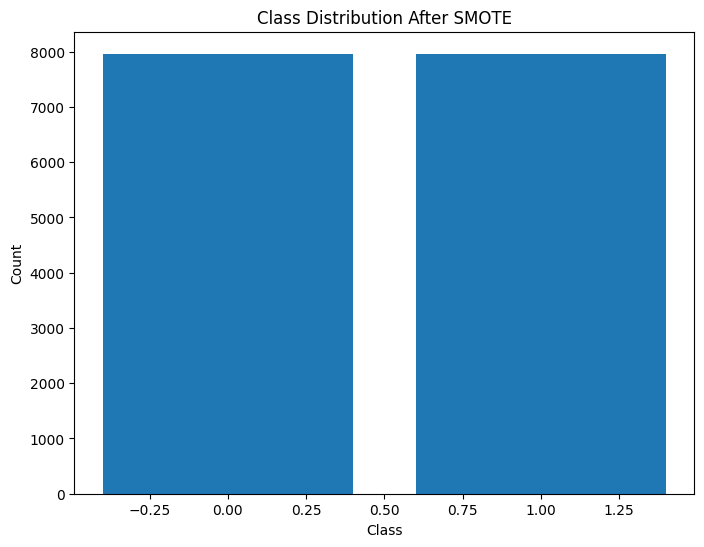

In [20]:
# After SMOTE
plt.figure(figsize=(8, 6))
plt.bar(target_balanced.value_counts().index, target_balanced.value_counts())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After SMOTE')
plt.show()

In [21]:
data_balanced

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,1,42,2,0.000000,1,1,1,101348.880000,1
1,2,15647311,1177,608,2,1,41,1,83807.860000,1,0,1,112542.580000,0
2,3,15619304,2040,502,0,1,42,8,159660.800000,3,1,0,113931.570000,1
3,4,15701354,289,699,0,1,39,1,0.000000,2,0,0,93826.630000,0
4,5,15737888,1822,850,2,1,43,2,125510.820000,1,1,1,79084.100000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,8685,15598986,573,697,0,1,48,6,195474.715363,3,0,1,131119.792573,1
15922,4356,15585832,1723,742,2,0,40,6,0.000000,1,0,0,163747.273923,1
15923,6102,15790004,1708,599,1,0,45,8,138487.686586,1,1,0,171962.457020,1
15924,9425,15687039,498,596,0,0,54,1,123508.117782,1,1,0,120314.456740,1


In [22]:
x=data_balanced.drop('Exited',axis='columns')
Y=data_balanced.Exited
#state = np.random.RandomState(42)
df=pd.DataFrame(data_balanced)
Y

0        1
1        0
2        1
3        0
4        0
        ..
15921    1
15922    1
15923    1
15924    1
15925    1
Name: Exited, Length: 15926, dtype: int64

In [23]:
data_balanced.describe()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15926.000000,1.592600e+04,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000
mean,4956.340387,1.569063e+07,1500.057202,648.809243,0.668655,0.398970,41.003391,4.806668,81681.798245,1.423019,0.625706,0.372787,100323.279096,0.500000
std,2707.119632,7.201660e+04,790.507115,91.503109,0.754369,0.489702,10.017617,2.734738,61207.750407,0.575978,0.483955,0.483561,57411.579233,0.500016
min,1.000000,1.556570e+07,0.000000,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2699.250000,1.562885e+07,852.000000,586.000000,0.000000,0.000000,34.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51398.593428,0.000000
50%,4931.000000,1.568998e+07,1517.000000,650.000000,0.000000,0.000000,40.000000,5.000000,103169.985000,1.000000,1.000000,0.000000,100800.675000,0.500000
75%,7190.000000,1.575284e+07,2134.000000,712.000000,1.000000,1.000000,47.000000,7.000000,128871.820286,2.000000,1.000000,1.000000,149662.690000,1.000000
max,10000.000000,1.581569e+07,2931.000000,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test= train_test_split(x,Y,test_size=0.2,random_state=42,stratify=Y)

In [25]:
from sklearn.ensemble import RandomForestClassifier
#build basic random forest model
rf_Model= RandomForestClassifier()
rf_Model.fit(x_train,Y_train)

RandomForestClassifier()

In [26]:
print(f'Train Accuracy - :{rf_Model.score(x_train,Y_train):.3f}')
print(f'Test Accuracy - :{rf_Model.score(x_test,Y_test):.3f}' )

Train Accuracy - :1.000
Test Accuracy - :0.869


In [27]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=rf_Model.predict(x_test)
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1593
           1       0.87      0.86      0.87      1593

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186

[[1392  201]
 [ 217 1376]]


In [28]:
from sklearn.linear_model import LogisticRegression

# Build basic Logistic Regression model
log_reg_Model = LogisticRegression()
log_reg_Model.fit(x_train, Y_train)

LogisticRegression()

In [29]:
print(f'Train Accuracy - :{log_reg_Model.score(x_train,Y_train):.3f}')
print(f'Test Accuracy - :{log_reg_Model.score(x_test,Y_test):.3f}' )

Train Accuracy - :0.572
Test Accuracy - :0.570


In [30]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=log_reg_Model.predict(x_test)
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.45      0.51      1593
           1       0.56      0.69      0.62      1593

    accuracy                           0.57      3186
   macro avg       0.57      0.57      0.56      3186
weighted avg       0.57      0.57      0.56      3186

[[ 712  881]
 [ 489 1104]]
